In [1]:
import numpy as np
from Bio.SeqIO.FastaIO import SimpleFastaParser
from Bio.pairwise2 import format_alignment
from Bio import pairwise2
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

In [2]:
finish = np.loadtxt('to_tsne.mat')
gen_ref_data = np.loadtxt('gen+ref.mat')
new_data = np.loadtxt('new_results_col.mat')

In [5]:
aav_labels = np.zeros(64)
dependo_labels = np.ones(614)
biocad_10 = np.array([i for i in range(1, 11)])
aav_labels_10_interested = np.concatenate((aav_labels, dependo_labels, biocad_10))
gen_ref_labels = np.concatenate((aav_labels, biocad_10))
new_labels = np.concatenate((dependo_labels, aav_labels))

In [59]:
finished = TSNE(n_components = 2, learning_rate = 'auto', n_iter = 5000, perplexity = 20).fit_transform(finish)

/Users/evgeny/.conda/envs/code/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [11]:
new_results = TSNE(n_components = 2, learning_rate = 'auto', n_iter = 5000, perplexity = 70).fit_transform(new_data)

/Users/evgeny/.conda/envs/code/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [96]:
gen_ref_tsne = TSNE(n_components = 2, learning_rate = 'auto', n_iter = 5000, perplexity = 8).fit_transform(gen_ref_data)

/Users/evgeny/.conda/envs/code/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


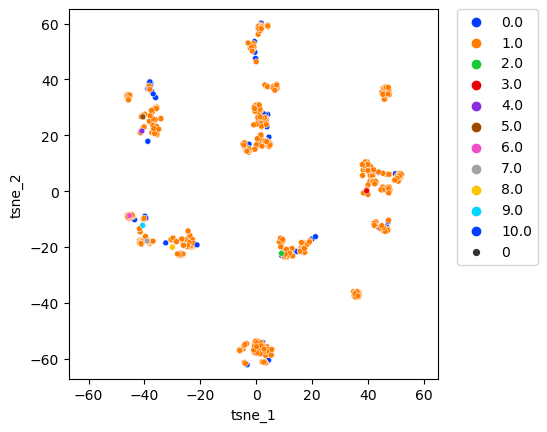

In [94]:
tsne_result_df = pd.DataFrame({'tsne_1': finished[:,0], 'tsne_2': finished[:,1], 'label': aav_labels_10_interested})
fig, ax = plt.subplots(1)
mpl.style.use('default')
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, size = 0, ax=ax,s=120, palette = "bright")
lim = (finished.min()-5, finished.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

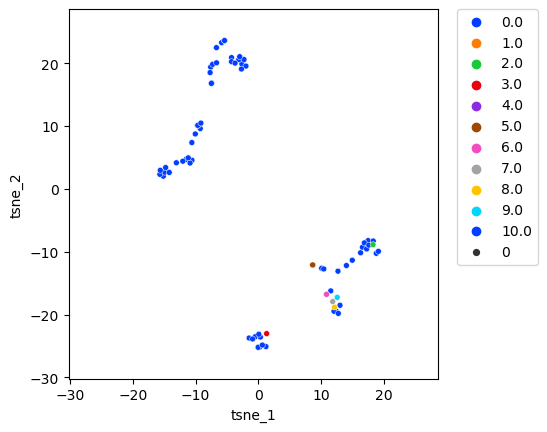

In [97]:
tsne_result_df = pd.DataFrame({'tsne_1': gen_ref_tsne[:,0], 'tsne_2': gen_ref_tsne[:,1], 'label': gen_ref_labels})
fig, ax = plt.subplots(1)
mpl.style.use('default')
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, size = 0, ax=ax,s=120, palette = "bright")
lim = (gen_ref_tsne.min()-5, gen_ref_tsne.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)